In [2]:
import tensorflow as tf
import keras
from keras import datasets
import matplotlib.pyplot as plt
from keras import utils, models, layers
from tensorflow.keras.layers import BatchNormalization, Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.metrics import confusion_matrix, classification_report
import cv2
import numpy as np

Cifar10

In [3]:
(X_train, Y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

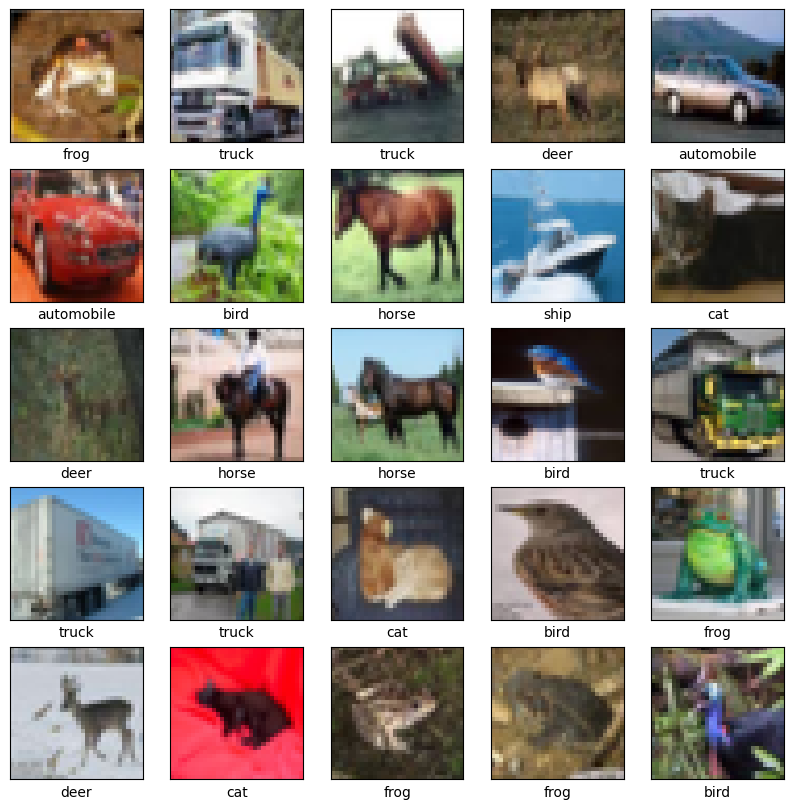

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
X_train = X_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
Y_train = utils.to_categorical(Y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [25]:
network = keras.Sequential()

# network.add(Input(shape=X_train[0].shape))

network.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
network.add(BatchNormalization())
network.add(MaxPool2D((2,2), 2))

network.add(Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(BatchNormalization())
network.add(MaxPool2D((2,2), 2))

network.add(Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(BatchNormalization())
network.add(MaxPool2D((2,2), 2))

network.add(Dense(128, activation='relu'))
network.add(Flatten())
network.add(Dense(10, activation='softmax'))

In [26]:
network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4, 4, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,146 (512.29 KB)

 Trainable params: 130,698 (510.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [28]:
network.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=15, batch_size=64)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.4718 - loss: 1.5034 - val_accuracy: 0.5253 - val_loss: 1.5843
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.6915 - loss: 0.8800 - val_accuracy: 0.6922 - val_loss: 0.8778
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7561 - loss: 0.6991 - val_accuracy: 0.6086 - val_loss: 1.2098
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7955 - loss: 0.5884 - val_accuracy: 0.7278 - val_loss: 0.8117
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.8286 - loss: 0.4935 - val_accuracy: 0.7156 - val_loss: 0.9036
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8568 - loss: 0.4162 - val_accuracy: 0.7431 - val_loss: 0.7869
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.8808 - loss: 0.3451 - val_accuracy: 0.7373 - val_loss: 0.8404
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.8939 - loss: 0.2974 - 

In [29]:
test_loss, test_acc = network.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7219 - loss: 1.4102


In [30]:
network.save('images_model.h5')

In [8]:
model = models.load_model('images_model.h5')

In [39]:
(X_train, Y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [9]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(class_names[y[index].astype('int')])

In [40]:
x_test = x_test.astype('float32')/255

In [41]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[6.8483059e-05, 2.7211181e-07, 2.0847635e-04, 4.6424940e-01,
        5.4320875e-12, 5.3219938e-01, 3.2543926e-03, 4.3700829e-06,
        1.4623413e-05, 5.4797567e-07],
       [3.5661109e-02, 2.6121843e-04, 1.0568486e-11, 5.1197786e-11,
        7.6551130e-13, 5.0916714e-12, 4.0635919e-17, 2.7097202e-13,
        9.6406984e-01, 7.8000294e-06],
       [2.1212293e-02, 5.3055666e-04, 9.4808115e-08, 1.1845980e-08,
        3.5293898e-10, 6.7114094e-08, 4.5319909e-10, 5.1745702e-10,
        9.7825646e-01, 4.1025967e-07],
       [9.5620614e-01, 2.7446308e-07, 1.8146762e-04, 8.4865833e-06,
        1.0311844e-06, 2.3962192e-09, 7.2878004e-10, 9.2759550e-11,
        4.3598153e-02, 4.4758231e-06],
       [5.6353048e-14, 1.1908550e-05, 2.6468150e-04, 9.1884285e-06,
        7.4853688e-07, 5.6588606e-10, 9.9971300e-01, 1.5093876e-15,
        4.7739934e-07, 6.9381978e-10]], dtype=float32)

In [55]:
y_test = y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [56]:
class_pred = [np.argmax(i) for i in y_pred]
class_pred[:10]

[np.int64(5),
 np.int64(8),
 np.int64(8),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

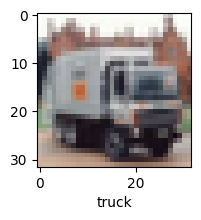

In [44]:
plot_sample(x_test, y_test, 11)

In [48]:
class_names[class_pred[11]]

'truck'

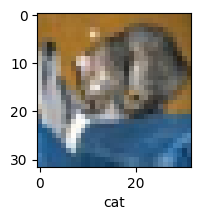

In [51]:
plot_sample(x_test, y_test, 0)

In [52]:
class_names[class_pred[0]]

'dog'

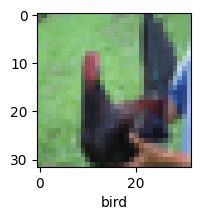

In [53]:
plot_sample(x_test, y_test, 25)

In [54]:
class_names[class_pred[25]]

'bird'

In [33]:
del X_train, Y_train, x_test, y_test, test_loss, test_acc, network, class_names

NameError: name 'X_train' is not defined

FMNIST

In [43]:
(X_train, Y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

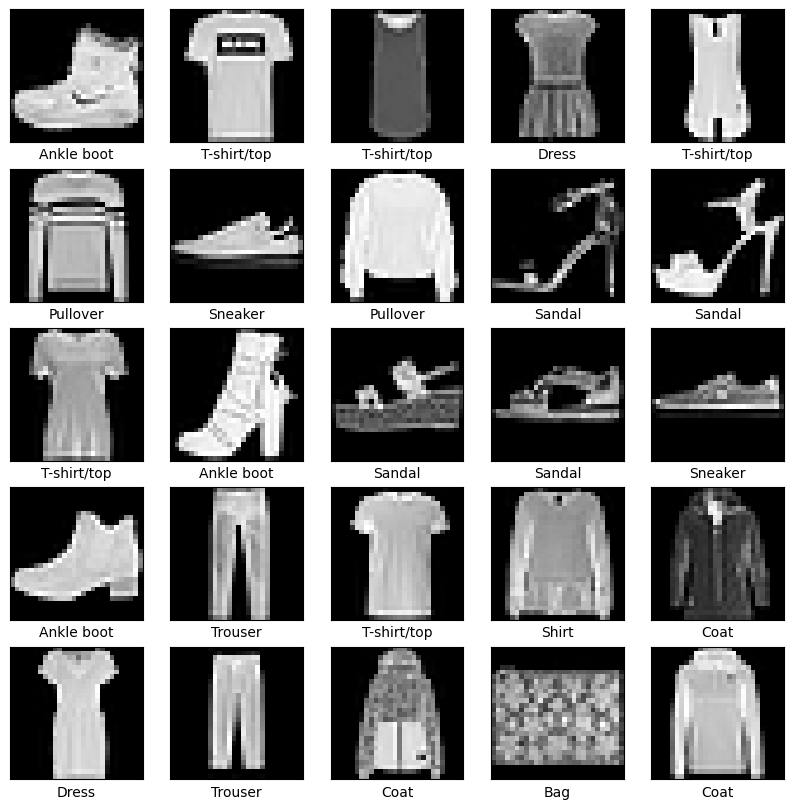

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [47]:
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)

In [48]:
print(X_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [49]:
X_train = X_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [50]:
Y_train = utils.to_categorical(Y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [51]:
network = keras.Sequential()

# network.add(Input(shape=X_train[0].shape))

network.add(Conv2D(64,(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
network.add(BatchNormalization())
network.add(MaxPool2D((2, 2), 2))

network.add(Conv2D(128,(5, 5), padding='same', activation='relu'))
network.add(BatchNormalization())
network.add(MaxPool2D((2, 2), 2))

network.add(Conv2D(256,(5, 5), padding='same', activation='relu'))
network.add(BatchNormalization())
network.add(MaxPool2D((2, 2), 2))

network.add(Dense(256, activation='relu'))
network.add(Flatten())
network.add(Dense(10, activation='softmax'))

In [52]:
network.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3, 3, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,682 (4.26 MB)

 Trainable params: 1,115,786 (4.26 MB)

 Non-trainable params: 896 (3.50 KB)

In [53]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [54]:
network.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=15, batch_size=64)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 290s 307ms/step - accuracy: 0.8222 - loss: 0.5319 - val_accuracy: 0.8431 - val_loss: 0.4105
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 270s 288ms/step - accuracy: 0.9063 - loss: 0.2513 - val_accuracy: 0.8911 - val_loss: 0.2983
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 252s 269ms/step - accuracy: 0.9255 - loss: 0.2025 - val_accuracy: 0.8948 - val_loss: 0.2919
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 255s 272ms/step - accuracy: 0.9359 - loss: 0.1742 - val_accuracy: 0.8633 - val_loss: 0.3832
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 234s 250ms/step - accuracy: 0.9454 - loss: 0.1462 - val_accuracy: 0.9088 - val_loss: 0.2639
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 245s 261ms/step - accuracy: 0.9552 - loss: 0.1208 - val_accuracy: 0.9190 - val_loss: 0.2586
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 250s 266ms/step - accuracy: 0.9608 - loss: 0.1039 - val_accuracy: 0.9003 - val_loss: 0.3026
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 267s 284ms/step - accuracy: 0.9688 -

In [55]:
test_loss, test_acc = network.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9180 - loss: 0.4559


In [56]:
network.save('fashion_model.h5')